# TIME Foundations II

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf

from utils import get_figure, time_plot, stationarity_tests
from data import get_electrocardiogram, get_apple_5y, get_france_death_rate_20y, get_switzerland_temperature

## Stationarity

### Strict Stationarity

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.2127)
	- ZA: Stationary (p-value: 0.0000)


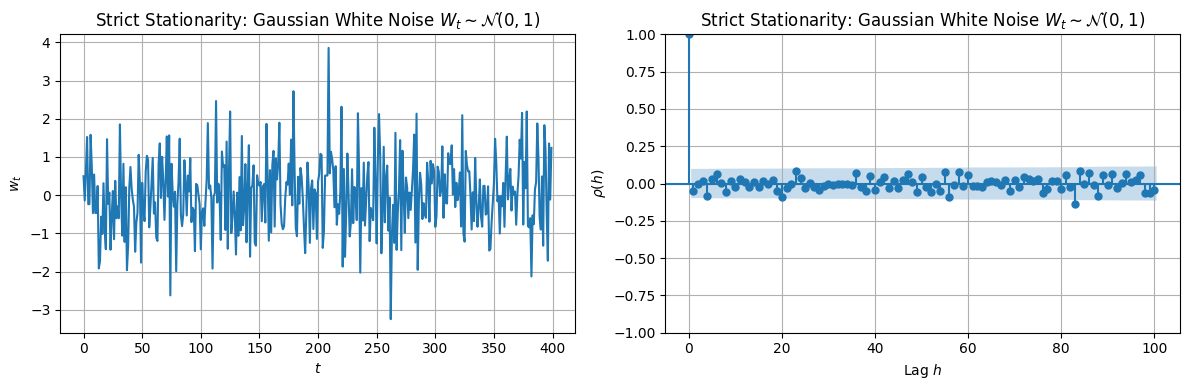

In [2]:
np.random.seed(42)
n = 400
data = np.random.normal(0, 1, n)
time_plot(
    x=np.arange(n),
    y=data,
    title='Strict Stationarity: Gaussian White Noise $W_t \sim \mathcal{N}(0, 1)$',
    ylabel='$w_t$',
    with_acf=True,
    nlags=100,
)
stationarity_tests(data)

### Weak Stationarity

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.0804)
	- ZA: Stationary (p-value: 0.0000)


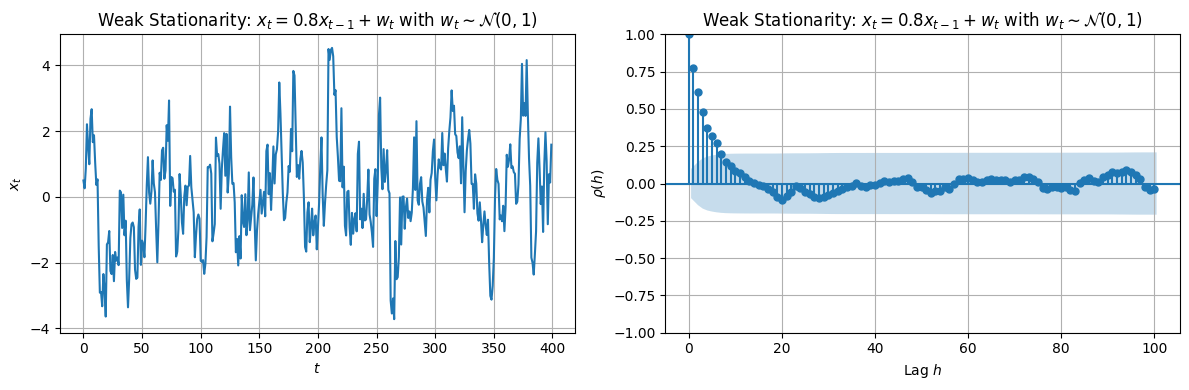

In [3]:
np.random.seed(42)
n = 400
weak_stationary_series = np.zeros(n)
w = np.random.normal(0, 1, n)
weak_stationary_series[0] = w[0]
for t in range(1, n):
    weak_stationary_series[t] = 0.8 * weak_stationary_series[t - 1] + w[t]
time_plot(
    x=np.arange(n),
    y=weak_stationary_series,
    title='Weak Stationarity: $x_t=0.8x_{t-1}+w_t$ with $w_t \sim \mathcal{N}(0, 1)$',
    with_acf=True,
    nlags=100,
)
stationarity_tests(weak_stationary_series)

## Visual inspection with correlogram

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Non-Stationary (p-value: 0.0002)
	- ZA: Stationary (p-value: 0.0000)


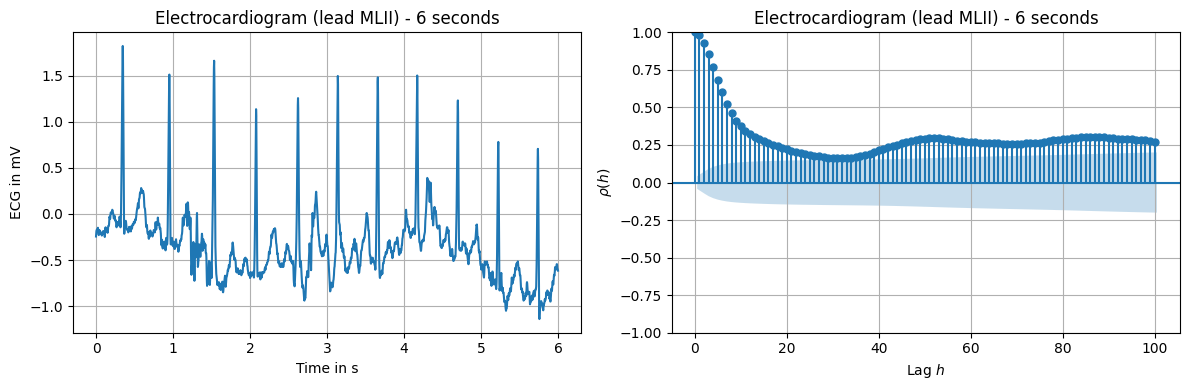

In [4]:
data = get_electrocardiogram()
data = data.iloc[:6*360]
time_plot(
    x=data['time'],
    y=data['ecg'],
    title=f'Electrocardiogram (lead MLII) - 6 seconds',
    xlabel='Time in s',
    ylabel='ECG in mV',
    with_acf=True,
    nlags=100,
)
stationarity_tests(data['ecg'])

/home/david/git/HSLU.Time/notebooks/data.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', period='5y')
[*********************100%***********************]  1 of 1 completed


Stationarity Test Results:
	- ADF: Non-Stationary (p-value: 0.7252)
	- PP: Non-Stationary (p-value: 0.7748)
	- KPSS: Non-Stationary (p-value: 0.0001)
	- ZA: Non-Stationary (p-value: 0.2515)


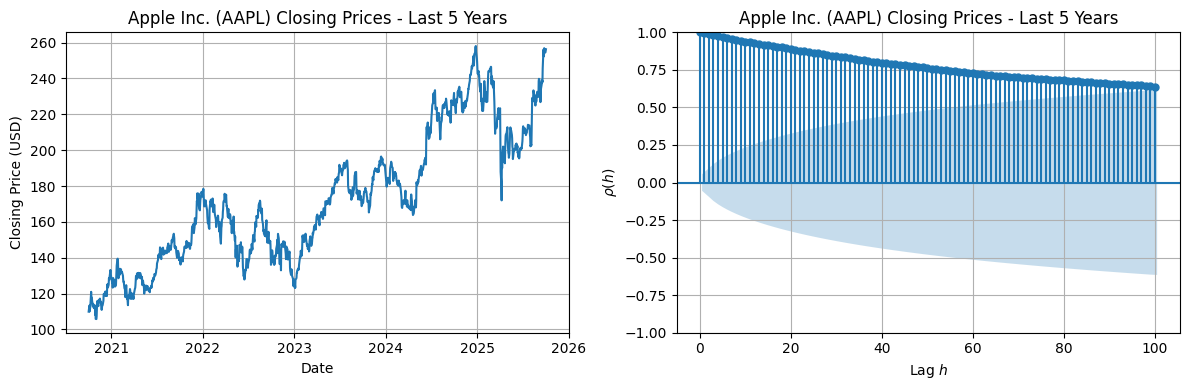

In [5]:
data = get_apple_5y()
time_plot(
    x=data.index,
    y=data['Close'],
    title='Apple Inc. (AAPL) Closing Prices - Last 5 Years',
    xlabel='Date',
    ylabel='Closing Price (USD)',
    with_acf=True,
    nlags=100,
)
stationarity_tests(data['Close'])

Stationarity Test Results:
	- ADF: Non-Stationary (p-value: 0.7629)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Non-Stationary (p-value: 0.0001)
	- ZA: Non-Stationary (p-value: 0.5844)


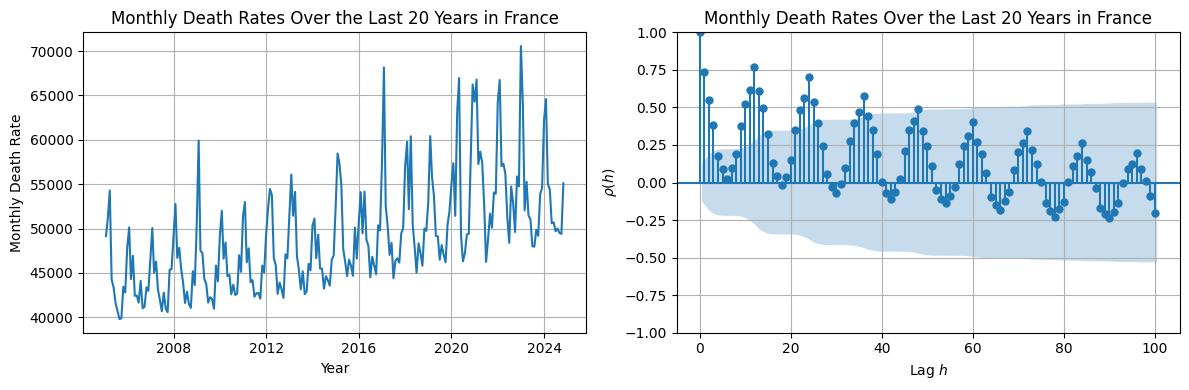

In [6]:
data = get_france_death_rate_20y()
time_plot(
    x=data['time'],
    y=data['value'],
    title='Monthly Death Rates Over the Last 20 Years in France',
    xlabel='Year',
    ylabel='Monthly Death Rate',
    with_acf=True,
    nlags=100,
)
stationarity_tests(data['value'])

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0037)
	- PP: Stationary (p-value: 0.0048)
	- KPSS: Stationary (p-value: 0.9955)
	- ZA: Non-Stationary (p-value: 0.2581)


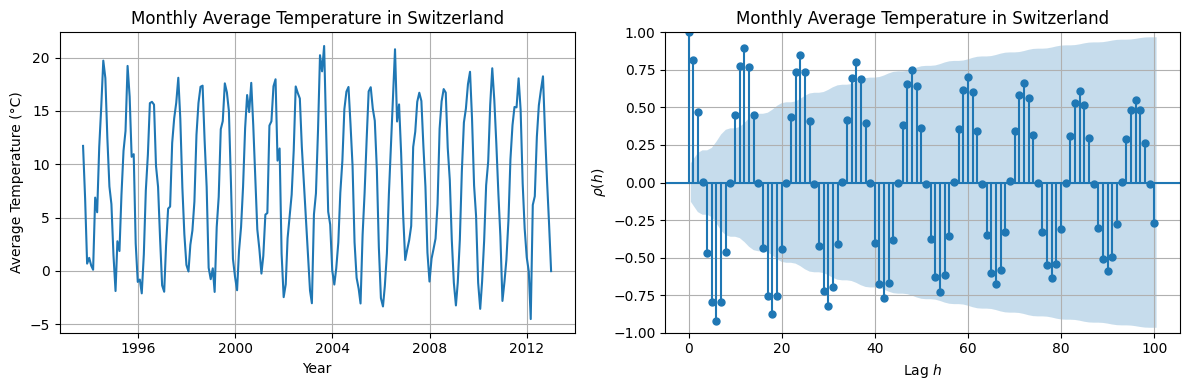

In [7]:
data = get_switzerland_temperature()
time_plot(
    x=data['dt'],
    y=data['AverageTemperature'],
    title=f'Monthly Average Temperature in Switzerland',
    xlabel='Year',
    ylabel='Average Temperature (°C)',
    with_acf=True,
    nlags=100,
)
stationarity_tests(data['AverageTemperature'])

## Non-linear transforms

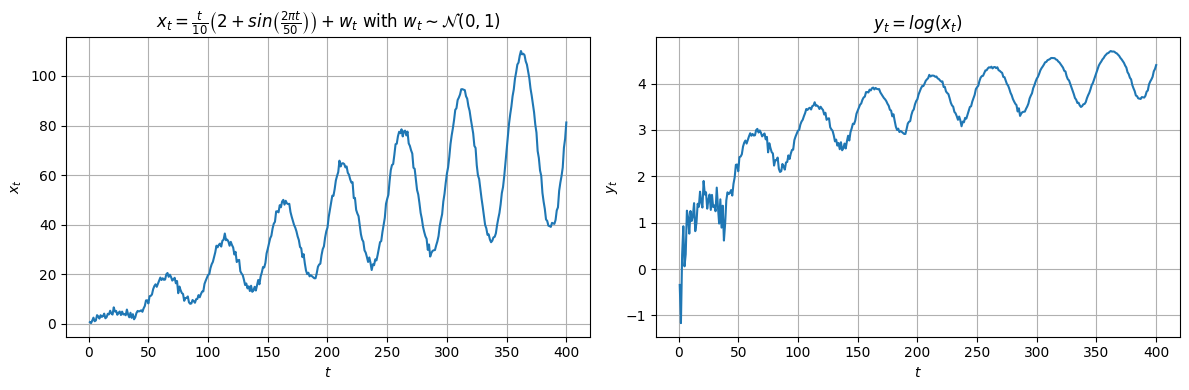

In [8]:
np.random.seed(42)
n = 400
samples = np.arange(1, n+1)
trend  = samples/10
seasonal = 2 + np.sin(2 * np.pi * samples / 50)
noise = np.random.normal(0, 1, n)
nonlinear_series = trend * seasonal + noise
fig, (ax1, ax2) = get_figure(ncols=2)
time_plot(
    x=samples,
    y=nonlinear_series,
    title='$x_t = \\frac{t}{10}\\left(2 + sin\\left(\\frac{2\pi t}{50}\\right)\\right) + w_t$ with $w_t \sim \mathcal{N}(0, 1)$',
    ax=ax1,
)
transformed_series = np.log(nonlinear_series)
time_plot(
    x=samples,
    y=transformed_series,
    title='$y_t = log(x_t)$',
    ylabel='$y_t$',
    ax=ax2
)

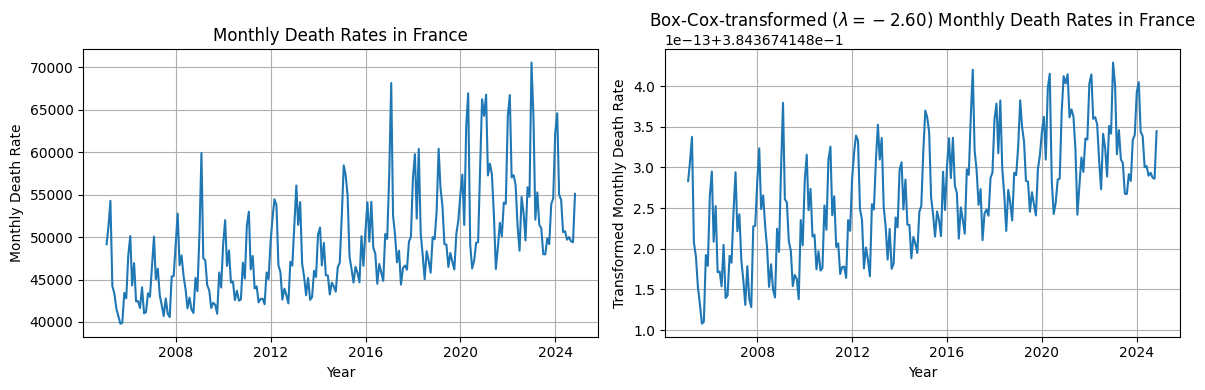

In [9]:
data = get_france_death_rate_20y()
transformed_data = data.copy()
transformed_data['value'], lmbda = stats.boxcox(data['value'])
fig, (ax1, ax2) = get_figure(ncols=2)
time_plot(
    x=data['time'],
    y=data['value'],
    title='Monthly Death Rates in France',
    xlabel='Year',
    ylabel='Monthly Death Rate',
    ax=ax1,
)
time_plot(
    x=transformed_data['time'],
    y=transformed_data['value'],
    title=f'Box-Cox-transformed ($\\lambda={float(lmbda):.2f}$) Monthly Death Rates in France',
    xlabel='Year',
    ylabel='Transformed Monthly Death Rate',
    ax=ax2,
)
fig.tight_layout()

## Differencing

/home/david/git/HSLU.Time/notebooks/data.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', period='5y')
[*********************100%***********************]  1 of 1 completed


Stationarity Test Results:
	- ADF: Non-Stationary (p-value: 0.7249)
	- PP: Non-Stationary (p-value: 0.7746)
	- KPSS: Non-Stationary (p-value: 0.0001)
	- ZA: Non-Stationary (p-value: 0.2514)
Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.9234)
	- ZA: Stationary (p-value: 0.0000)


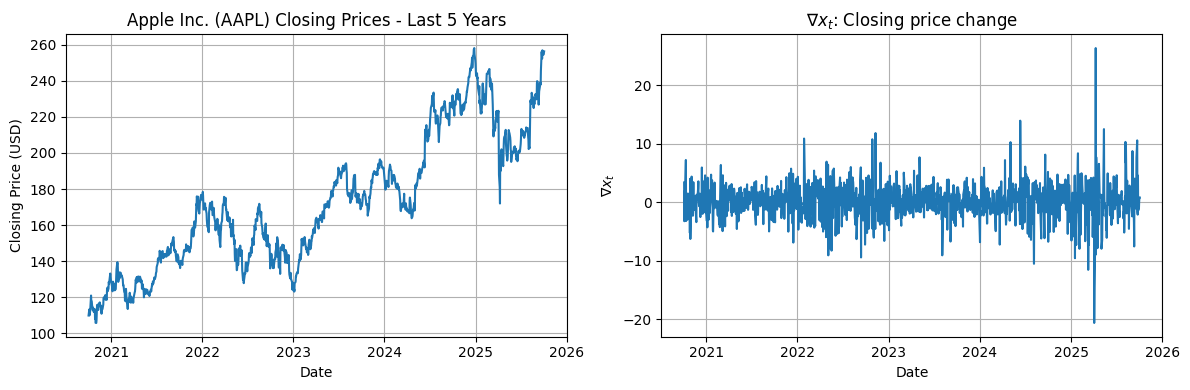

In [10]:
data = get_apple_5y()
fig, (ax1, ax2) = get_figure(ncols=2)
time_plot(
    x=data.index,
    y=data['Close'],
    title='Apple Inc. (AAPL) Closing Prices - Last 5 Years',
    xlabel='Date',
    ylabel='Closing Price (USD)',
    ax=ax1,
)
stationarity_tests(data['Close'])
differenced_data = data['Close'].diff().dropna()
time_plot(
    x=differenced_data.index,
    y=differenced_data,
    title='$\\nabla x_t$: Closing price change',
    xlabel='Date',
    ylabel='$\\nabla x_t$',
    ax=ax2,
)
stationarity_tests(differenced_data)
fig.tight_layout()

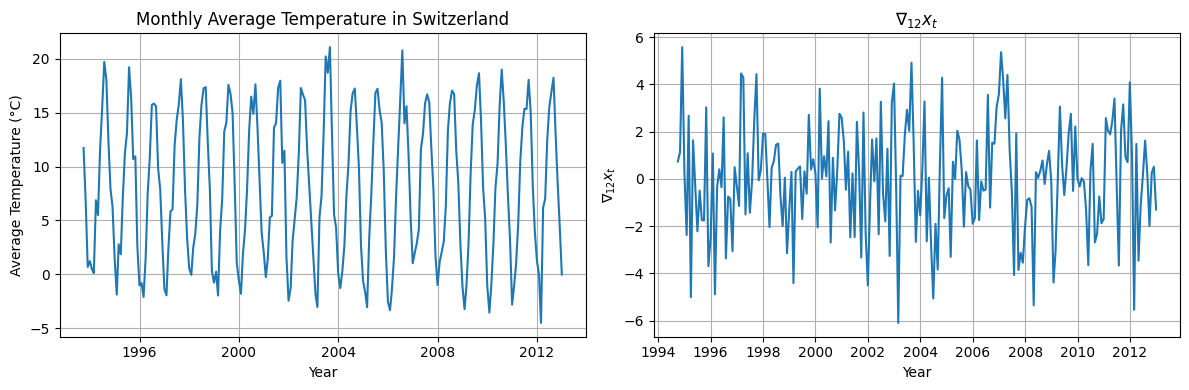

In [11]:
data = get_switzerland_temperature()
fig, (ax1, ax2) = get_figure(ncols=2)
time_plot(
    x=data['dt'],
    y=data['AverageTemperature'],
    title=f'Monthly Average Temperature in Switzerland',
    xlabel='Year',
    ylabel='Average Temperature (°C)',
    ax=ax1
)
time_plot(
    x=data['dt'],
    y=data['AverageTemperature'].diff(periods=12),
    title='$\\nabla_{12} x_t$',
    xlabel='Year',
    ylabel='$\\nabla_{12} x_t$',
    ax=ax2
)

Stationarity Test Results:
	- ADF: Non-Stationary (p-value: 0.9983)
	- PP: Non-Stationary (p-value: 1.0000)
	- KPSS: Non-Stationary (p-value: 0.0001)
	- ZA: Non-Stationary (p-value: 0.9916)
Stationarity Test Results:
	- ADF: Non-Stationary (p-value: 0.7866)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Non-Stationary (p-value: 0.0001)
	- ZA: Stationary (p-value: 0.0000)
Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.9848)
	- ZA: Stationary (p-value: 0.0000)


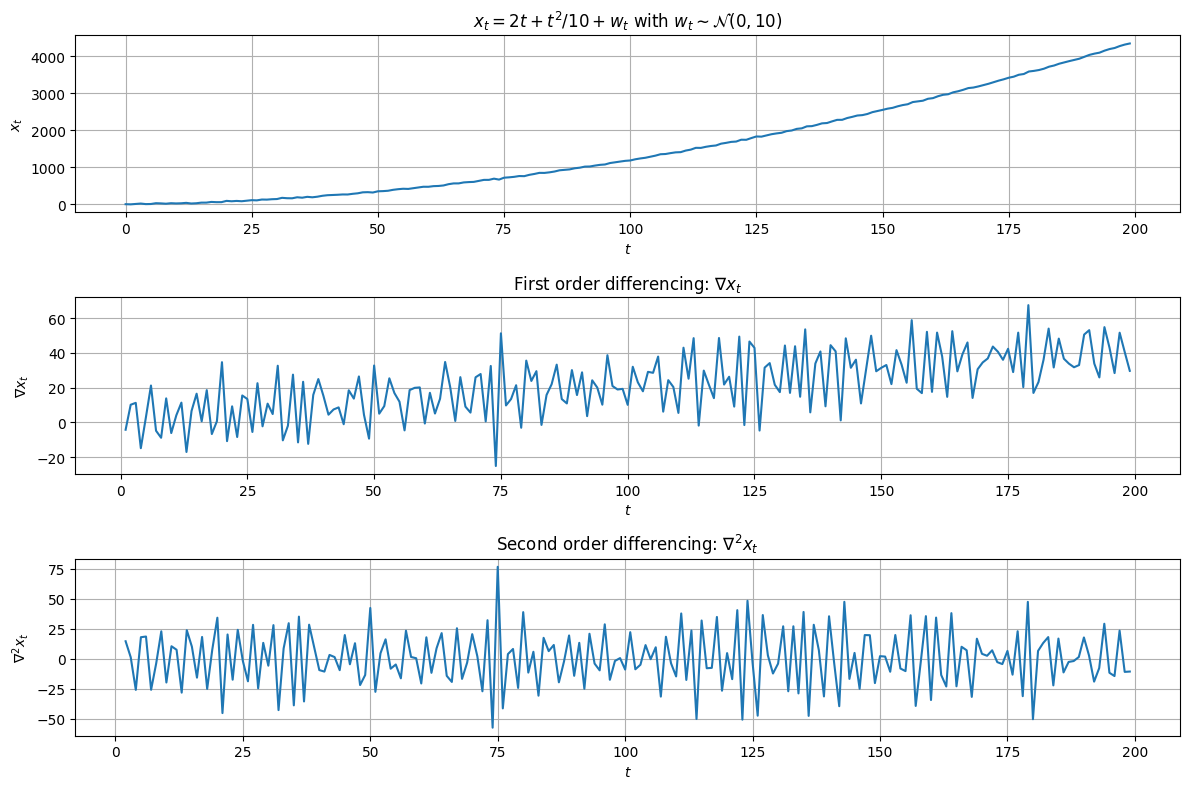

In [12]:
np.random.seed(42)
n = 200
t = np.arange(n)
trend = 0.1 * t**2 + 2 * t
noise = np.random.normal(0, 10, n)

y = pd.Series(trend + noise)            # Time series with quadratic trend
y_diff1 = y.diff().dropna()             # First-order differencing
y_diff2 = y.diff().diff().dropna()      # Second-order differencing

fig, (ax1, ax2, ax3) = get_figure(nrows=3, figsize=(12, 8))
time_plot(
    x=y.index,
    y=y,
    title='$x_t = 2t + t^2/10 + w_t$ with $w_t \sim \mathcal{N}(0,10)$',
    ax=ax1,
)
stationarity_tests(y)
time_plot(
    x=y_diff1.index,
    y=y_diff1,
    title='First order differencing: $\\nabla x_t$',
    ylabel='$\\nabla x_t$',
    ax=ax2,
)
stationarity_tests(y_diff1)
time_plot(
    x=y_diff2.index,
    y=y_diff2,
    title='Second order differencing: $\\nabla^2 x_t$',
    ylabel='$\\nabla^2 x_t$',
    ax=ax3,
)
stationarity_tests(y_diff2)
fig.tight_layout()

## Exercise

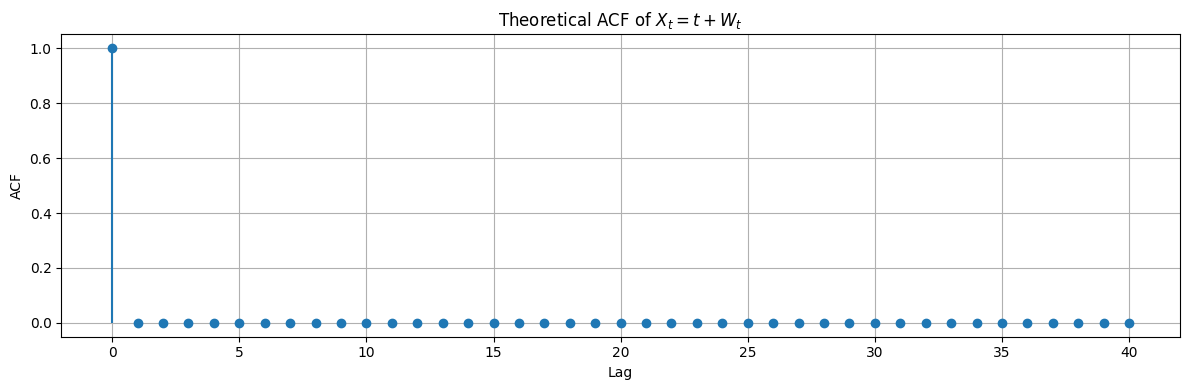

In [13]:
fig, [ax] = get_figure()
acf = np.array([1] + [0] * 40)
ax.stem(range(41), acf, basefmt=" ")
ax.set_title("Theoretical ACF of $X_t = t + W_t$")
ax.set_xlabel("Lag")
ax.set_ylabel("ACF")
fig.tight_layout()

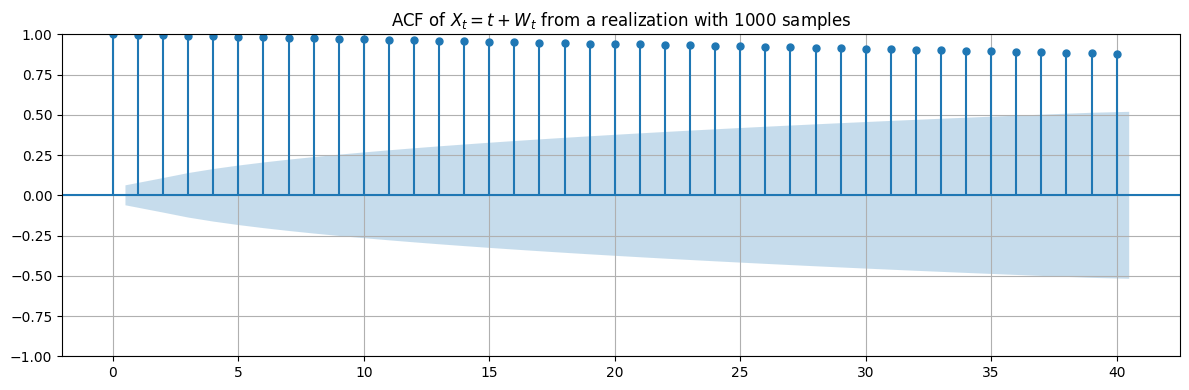

In [14]:
np.random.seed(42)
n = 1000
t = np.arange(n)
time_series = t + np.random.normal(loc=0, scale=1, size=n)
fig, [ax] = get_figure()
plot_acf(time_series, lags=40, ax=ax)
ax.set_title("ACF of $X_t = t + W_t$ from a realization with 1000 samples")
fig.tight_layout()